<CENTER><H1>NEW YORK TAXI FARE PREDICTION</H1></CENTER>

<H2></H2>

In [120]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')
import tensorflow as tf
from math import radians, cos, sin, asin, sqrt

<H2>READING DATA</H2>

In [127]:
train =  pd.read_csv('train_NYTaxi.csv')
test =  pd.read_csv('test_NYTaxi.csv')
df_train=train
df_test=test
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [128]:
# check datatypes
train.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [129]:
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,11.333564,-72.448815,39.887315,-72.479259,39.890066,1.682150
std,28867.657797,9.810826,10.869743,6.383817,12.774264,6.260724,1.308617
min,0.000000,-9.300000,-736.516667,-74.015935,-2319.633333,-74.011085,0.000000
25%,24999.750000,6.000000,-73.992133,40.734793,-73.991443,40.734034,1.000000
50%,49999.500000,8.500000,-73.981850,40.752464,-73.980214,40.753092,1.000000
75%,74999.250000,12.500000,-73.967172,40.767032,-73.963718,40.768042,2.000000
max,99999.000000,394.000000,40.801777,404.666667,40.787037,44.640672,6.000000


<H2>DATA CLEANING</H2>

In [130]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
Unnamed: 0           0
dtype: int64

In [131]:
#check for missing values in test data
test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [132]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [133]:
train.shape

(100000, 9)

In [134]:
#check the target column
train['fare_amount'].describe()

count    100000.000000
mean         11.333564
std           9.810826
min          -9.300000
25%           6.000000
50%           8.500000
75%          12.500000
max         394.000000
Name: fare_amount, dtype: float64

In [135]:
#38 fields have negative fare_amount values.
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 99997, True: 3})

In [136]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(99997, 9)

In [137]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    99997.000000
mean        11.334091
std          9.810489
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        394.000000
Name: fare_amount, dtype: float64

In [138]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False)

81847    394.00
84626    300.00
91643    250.00
47682    188.88
9206     176.00
43695    168.83
35046    160.00
91378    160.00
58545    160.00
93773    157.70
81769    155.33
89280    150.16
26388    150.00
10543    150.00
20679    148.00
5357     140.00
90838    139.30
41727    138.50
1558     135.00
4581     134.33
93850    131.00
6932     130.33
95669    127.29
13627    124.08
45880    124.00
10728    120.00
87177    120.00
86050    113.00
16145    111.00
53138    109.00
          ...  
63396      2.50
63297      2.50
50392      2.50
23221      2.50
50416      2.50
5330       2.50
88552      2.50
49236      2.50
35036      2.50
974        2.50
5138       2.50
49006      2.50
49081      2.50
97925      2.50
63969      2.50
63775      2.50
45386      2.50
88715      2.50
88711      2.50
88706      2.50
23757      2.50
16938      2.50
9695       2.50
79187      2.50
75322      1.00
91962      0.01
15741      0.01
72873      0.00
44049      0.00
55472      0.00
Name: fare_amount, Lengt

In [139]:
train['passenger_count'].describe()

count    99997.000000
mean         1.682150
std          1.308626
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [140]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#LOL! One field. this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [141]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [142]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe()

count    99997.000000
mean         1.682150
std          1.308626
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [143]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    99997.000000
mean        39.887288
std          6.383911
min        -74.015935
25%         40.734792
50%         40.752463
75%         40.767032
max        404.666667
Name: pickup_latitude, dtype: float64

In [144]:
train[train['pickup_latitude']<-90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [145]:
#We need to drop these outliers
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [146]:
#12 rows dropped
train.shape

(99996, 9)

In [147]:
train[train['pickup_longitude']<-180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5897,5897,2012-05-26 08:18:00.00000070,19.3,2012-05-26 08:18:00 UTC,-736.516667,40.7548,-73.940955,40.829285,6


In [148]:
train[train['pickup_longitude']>180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [149]:
train = train.drop(((train[train['pickup_latitude']<-180])|(train[train['pickup_latitude']>180])).index, axis=0)

In [150]:
#11 rows dropped
train.shape

(99996, 9)

In [151]:
#similar operation for dropoff latitude and longitude
train[train['dropoff_latitude']<-90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [152]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [153]:
#8 rows dropped
train.shape

(99996, 9)

In [154]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [155]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [156]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [157]:
#check the dtypes after conversion
train.dtypes

Unnamed: 0                         int64
key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [158]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [159]:
#check the data
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5


<CENTER><H1>EDA</H1></CENTER>
The following are my considerations -

Does the number of passengers affect the fare?
Does the date and time of pickup affect the fare?
Does the day of the week affect the fare?
Does the distance travelled affect the fare?
First, let's split the datetime field 'pickup_datetime' to the following -

year
month
date
hour
day of week
Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

In [160]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [161]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [162]:
train['H_Distance'].head(10)

0    1.116850
1    1.055053
2    2.715959
3    5.101370
4    4.800593
5    7.088301
6    3.140583
7    3.191260
8    1.127758
9    0.117131
Name: H_Distance, dtype: float64

Now that we have calculated the distance, we shall create columns for the following - 
* year
* month
* date
* hour
* day of week

In [163]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

Text(0, 0.5, 'Frequency')

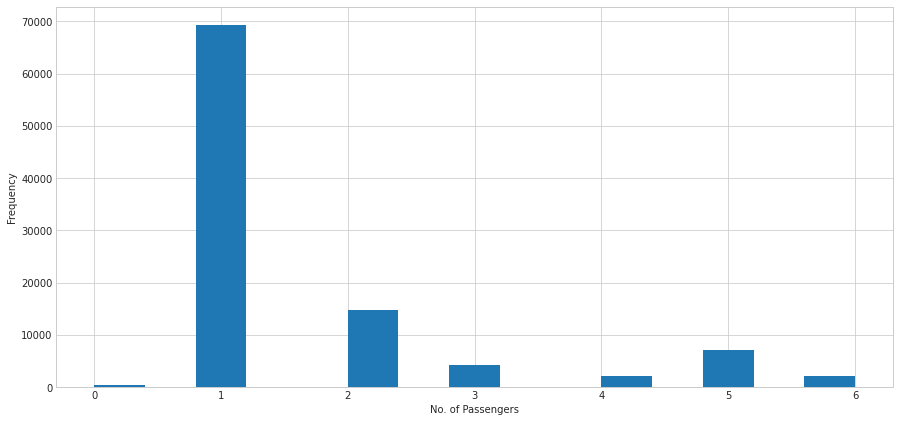

In [164]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

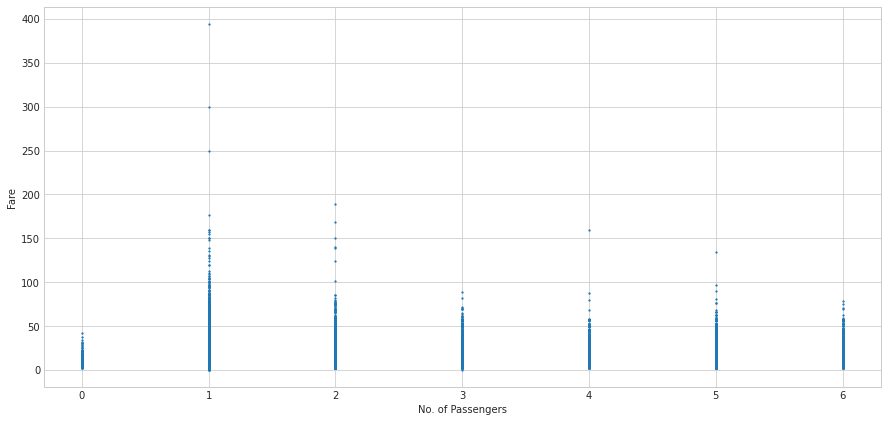

In [165]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**2. Does the date and time of pickup affect the fare?**

Text(0, 0.5, 'Fare')

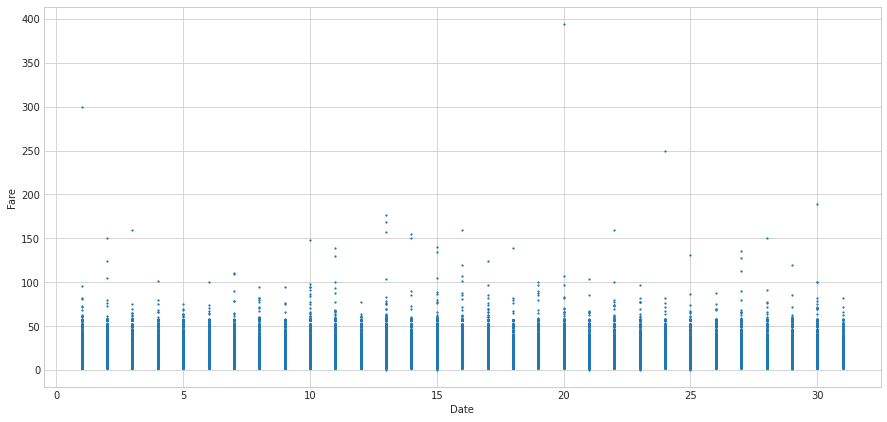

In [166]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

Text(0, 0.5, 'Frequency')

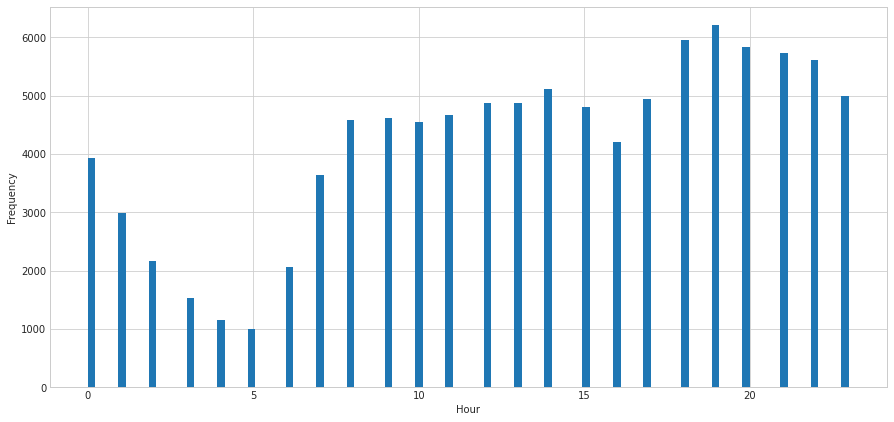

In [167]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0, 0.5, 'Fare')

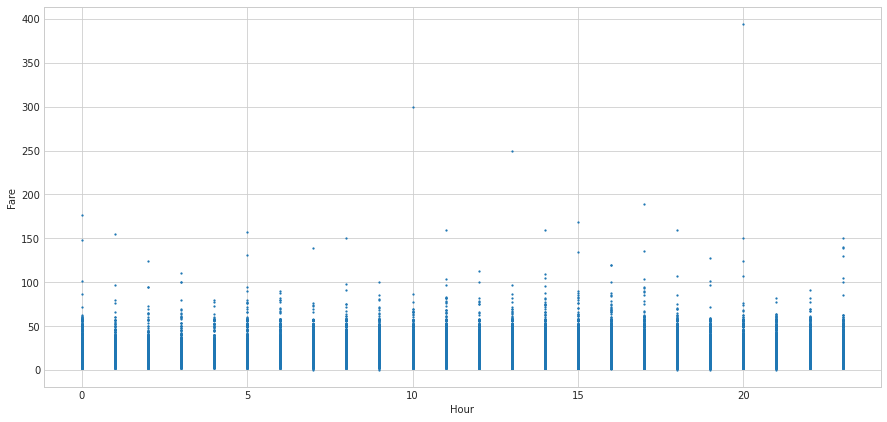

In [168]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?  

**3. Does the day of the week affect the fare?**

Text(0, 0.5, 'Fare')

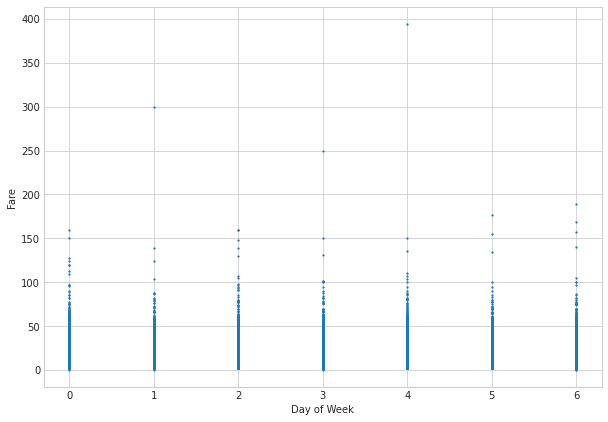

In [169]:
plt.figure(figsize=(10,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work, or grab a drink from close by. Hmmm..

**4. Does the distance affect the fare?**

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [170]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)
len(train)

99996

In [171]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

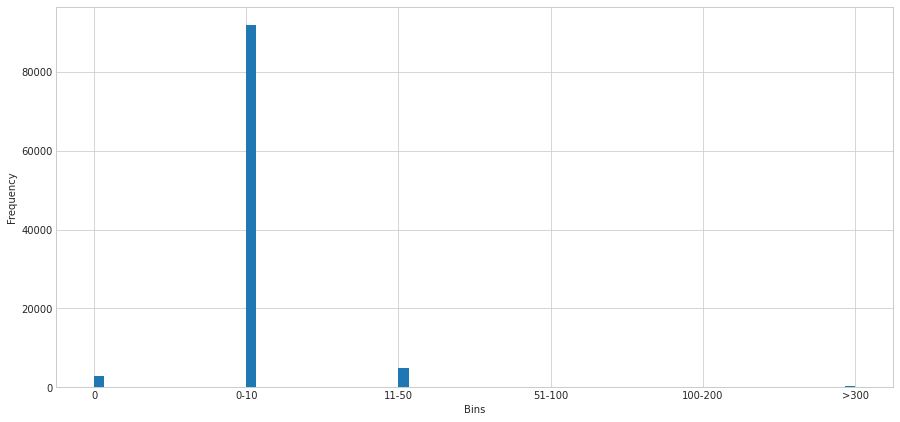

In [172]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [173]:
Counter(dist_bins['bins'])

Counter({'0': 2864,
         '0-10': 91934,
         '100-200': 20,
         '11-50': 4960,
         '51-100': 14,
         '>300': 204})

There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following - 
1.  Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
2. vice versa of point 1.
3. Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [174]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]
high_distance.shape

(204, 15)

As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula 

> *distance = (fare_amount - 2.5)/1.56*

In [175]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

/home/prachi/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
#The distance values have been replaced by the newly calculated ones according to the fare
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [177]:
train.shape

(99996, 15)

In [178]:
train[train['H_Distance']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
19,19.0,2009-11-13 15:52:00.000000780,7.30,2009-11-13 15:52:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2009.0,11.0,13.0,4.0,15.0
32,32.0,2009-12-10 00:55:00.000000320,17.30,2009-12-10 00:55:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2009.0,12.0,10.0,3.0,0.0
38,38.0,2013-04-28 01:19:56.000000100,22.50,2013-04-28 01:19:56,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2013.0,4.0,28.0,6.0,1.0
39,39.0,2011-07-10 20:07:56.000000500,32.10,2011-07-10 20:07:56,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,10.0,6.0,20.0
103,103.0,2014-04-29 11:36:00.000000260,12.00,2014-04-29 11:36:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2014.0,4.0,29.0,1.0,11.0
181,181.0,2013-08-23 07:17:00.000000340,14.50,2013-08-23 07:17:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,8.0,23.0,4.0,7.0
184,184.0,2010-12-30 14:45:44.000000100,12.10,2010-12-30 14:45:44,-73.843560,40.838921,-73.843560,40.838921,2.0,0.0,2010.0,12.0,30.0,3.0,14.0
215,215.0,2015-02-16 14:34:51.000000400,5.00,2015-02-16 14:34:51,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,2.0,16.0,0.0,14.0
232,232.0,2012-11-04 03:24:00.000000730,10.00,2012-11-04 03:24:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,11.0,4.0,6.0,3.0
285,285.0,2011-05-07 11:49:25.000000200,6.50,2011-05-07 11:49:25,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,5.0,7.0,5.0,11.0


We can see a few rows with distance =0. This could be due to 2 reasons 
1. The cab waited the whole time and the passenger eventually cancelled. *That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.*
2. The pickup and drop co-ordinates were not entered. In other words, these are **missing values**!

28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices  - 

* $$2.5 base-price  +  $1.56/km --> 6AM to 8PM Mon-Fri

* $$3.0 base-price  +  $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.


**SCENARIO 1**

Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [179]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


**SCENARIO 2**

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [180]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


**SCENARIO 3**

Fare is 0, but Distance is not 0. These values need to be imputed.

I can calculate the fare as I have the distance. I shall use the following formula
> *fare = 2.5 + 1.56(H_Distance)*

In [181]:
scenario_3=train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]
scenario_3

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
44049,44049.0,2015-01-25 18:00:06.000000500,0.0,2015-01-25 18:00:06,-73.801102,40.670094,-73.801086,40.670536,1.0,0.049221,2015.0,1.0,25.0,6.0,18.0
55472,55472.0,2015-02-23 09:34:48.000000200,0.0,2015-02-23 09:34:48,-73.982201,40.768417,-73.981392,40.764874,1.0,0.399901,2015.0,2.0,23.0,0.0,9.0
72873,72873.0,2015-01-15 07:49:05.000000400,0.0,2015-01-15 07:49:05,-73.901909,40.763988,-73.901917,40.763969,3.0,0.002216,2015.0,1.0,15.0,3.0,7.0


In [182]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

/home/prachi/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [183]:
scenario_3['fare_amount']

44049    2.576785
55472    3.123845
72873    2.503457
Name: fare_amount, dtype: float64

In [184]:
train.update(scenario_3)

In [185]:
train.shape

(99996, 15)

**SCENARIO 4**

Fare is  not 0, but Distance is 0. These values need to be imputed.
These 2882 rows need to be imputed using the following formula - 
> *distance = (fare_amount - 2.5)/1.56*

In [186]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]
len(scenario_4)

2882

In [187]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [188]:
len(scenario_4_sub)

2732

In [189]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

/home/prachi/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
train.update(scenario_4_sub)

<H1><CENTER>DATA VISUALIZATION</H1></CENTER>

In [7]:
print('Old size: %d' % len(df_train))
df_train = df_train[train.fare_amount>=0]
print('New size: %d' % len(train))

Old size: 100000
New size: 99997


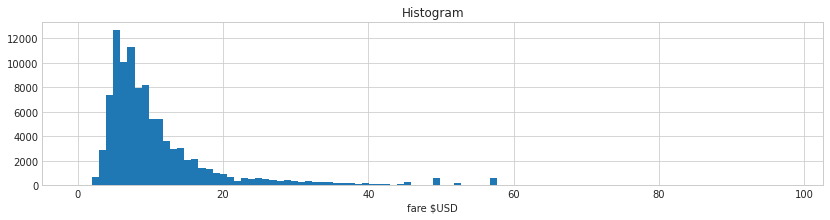

In [8]:
#df_train=train
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [10]:
print(df_train.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
print('Old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df_train))

Old size: 99997
New size: 99997


In [13]:
# read data in pandas dataframe
df_test=test
#df_test =  pd.read_csv('../input/test.csv')
df_test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [14]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [15]:
# minimum and maximum longitude test set
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [16]:
# minimum and maximum latitude test
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [24]:
# this function will also be used with the test set below
import ssl
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('Images/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('Images/nyc_-74.3_-73.7_40.5_40.9.png')

In [25]:
print('Old size: %d' % len(df_train))
df_train = df_train[select_within_boundingbox(df_train, BB)]
print('New size: %d' % len(df_train))

Old size: 97820
New size: 97820


In [26]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

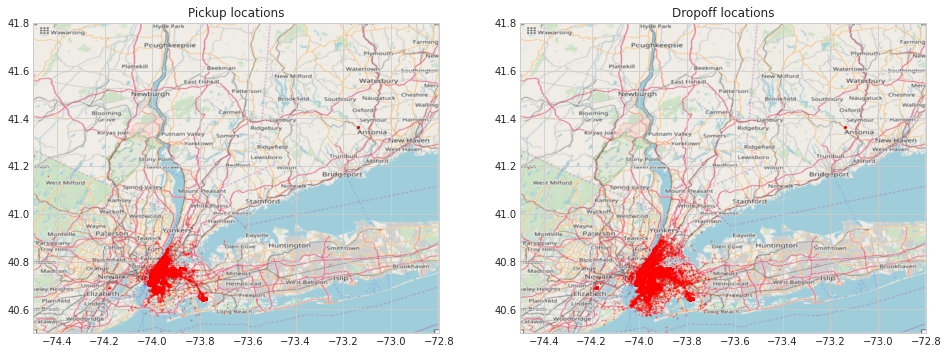

In [27]:
# plot training data on map
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

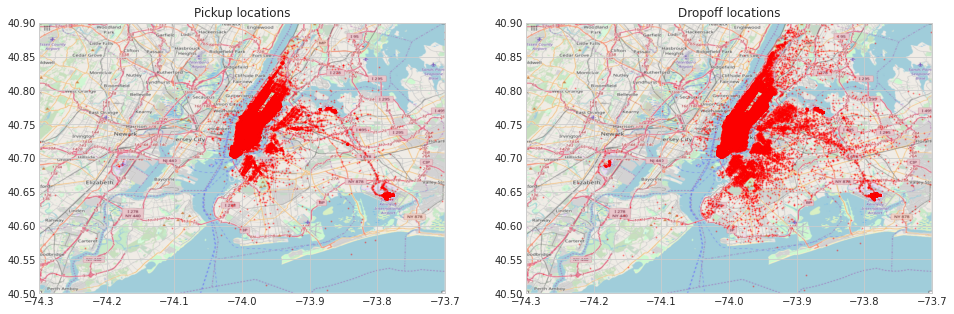

In [28]:
# plot training data on map zoomed in
plot_on_map(df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

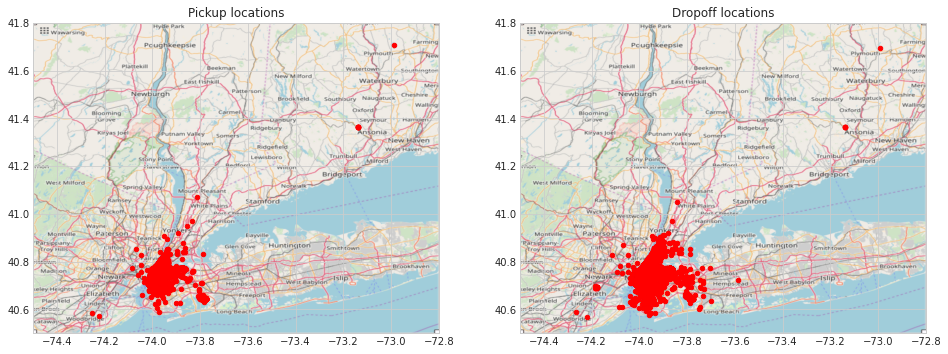

In [29]:
# plot test data on map
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

In [30]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

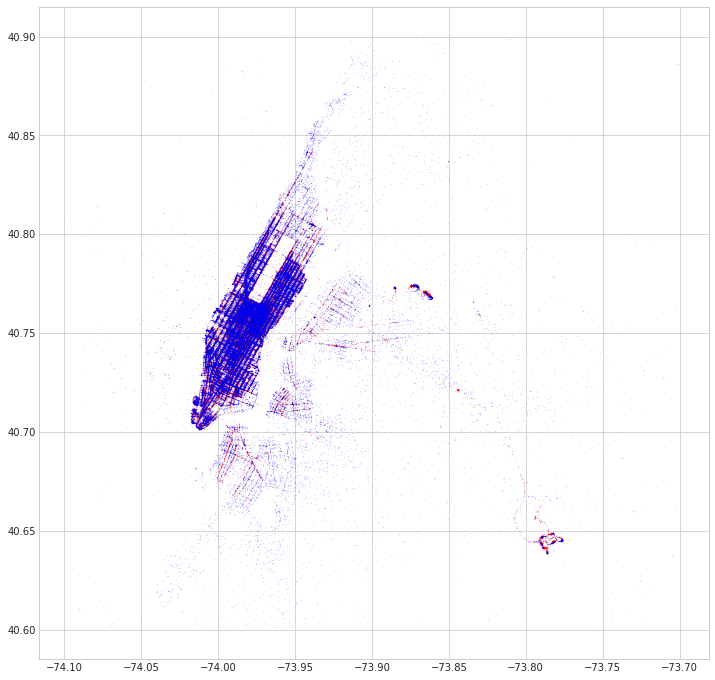

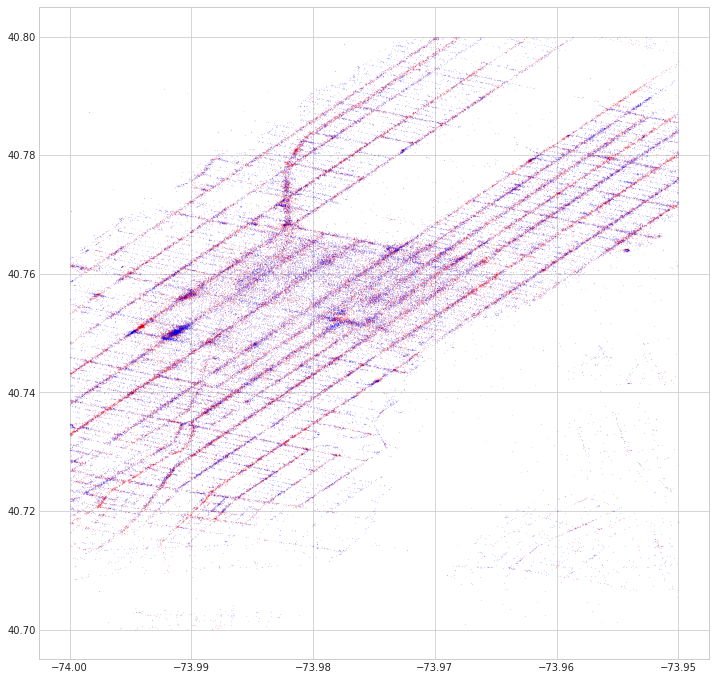

In [31]:
plot_hires(df_train, (-74.1, -73.7, 40.6, 40.9))
plot_hires(df_train, (-74, -73.95, 40.7, 40.8))

<CENTER><H1>PIPELINE</H1></CENTER>

In [252]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def haversine_distance(lat1, long1, lat2, long2,X):
    
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(X[lat1])
        phi2 = np.radians(X[lat2])
    
        delta_phi = np.radians(X[lat2]-X[lat1])
        delta_lambda = np.radians(X[long2]-X[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        X['H_Distance'] = d
        return d

#haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

class remove_missing_values(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.drop(X[X.isnull().any(1)].index, axis = 0)
        return X

class CalculateDistance(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X['H_Distance']=haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',X)
        return X


class delete_rows(BaseEstimator,TransformerMixin):

    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        
        X.drop(X[(X["pickup_latitude"]<-90) | (X["pickup_latitude"]>90)].index,inplace=True)
        X.drop(X[(X["pickup_longitude"]<-180) | (X["pickup_longitude"]>180)].index,inplace=True)
        X.drop(X[(X["dropoff_latitude"]<-90) | (X["dropoff_latitude"]>90)].index,inplace=True)
        X.drop(X[(X["dropoff_longitude"]<-180) | (X["dropoff_longitude"]>180)].index,inplace=True)
        X.drop(X[X["H_Distance"]>100].index,inplace=True)
        X.drop(X[(X["pickup_longitude"]==0)&(X["pickup_latitude"]==0)&(X["dropoff_longitude"]==0)&(X["dropoff_longitude"]==0)].
               index,inplace=True)
        X.drop(X[(X["passenger_count"]==0) | (X["passenger_count"]>6)].index,inplace=True)
        
        #X.drop(X[(X["fare_amount"]<=0) | (X["fare_amount"]>200)].index,inplace=True)
        return X

class add_features(BaseEstimator, TransformerMixin):
    # We are calculating three new features. we are taking which combinations to take or leave
    def __init__(self, Year=True, Month=True, Date=True, Day_of_Week=True, Hour=True):
        self.Year = Year
        self.Month = Month
        self.Date = Date
        self.Day_of_Week=Day_of_Week
        self.Hour=Hour
    
    # Fit have no work, as nothing to train or calclate
    def fit(self, X, y=None):
        return self
    
    # In transform, we are adding all new features
    def transform(self, X):
        
        X['key'] = pd.to_datetime(X['key'])
        X['pickup_datetime']  = pd.to_datetime(X['pickup_datetime'])
        #X["pickup_datetime"].head()
        data = [X,test]
        for i in data:
            i['Year'] = i['pickup_datetime'].dt.year
            i['Month'] = i['pickup_datetime'].dt.month
            i['Date'] = i['pickup_datetime'].dt.day
            i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
            i['Hour'] = i['pickup_datetime'].dt.hour
            return X

class ColDropper(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["key","pickup_datetime"],axis=1)
    

pre_pipe = Pipeline([
    ("Distance",CalculateDistance()),
    ("Add_features",add_features()),
    ("ColDropper",ColDropper()),
     ("delete_rows",delete_rows()),
    #("standardscalre",StandardScaler())
])

train_transform = pre_pipe.fit_transform(train)


In [253]:
train_transform.shape

(97543, 13)

In [254]:
X = train_transform.drop(['fare_amount'], axis=1)
y = train_transform['fare_amount']

<H1><CENTER>TRAIN-TEST SPLIT</H1></CENTER>

In [255]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.05)

X_train.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
96708,96708.0,-73.998070,40.740860,-73.943016,40.690823,1.0,7.244740,2015,2,10,1,20
33864,33864.0,-73.825763,40.681638,-73.785987,40.638995,1.0,5.808662,2012,9,6,3,5
32838,32838.0,-73.982830,40.742192,-73.999620,40.744130,1.0,1.430812,2014,12,13,5,19
98069,98069.0,-73.987426,40.755973,-73.998093,40.741288,1.0,1.863813,2013,4,23,1,21
82891,82891.0,-74.003150,40.728248,-73.979928,40.691968,1.0,4.483920,2014,4,17,3,23


<H1><CENTER>APPLYING MODELS</H1></CENTER>

<H2>LINEAR REGRESSION USING NORMAL EQUATION</H2>

In [235]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [236]:
# Import MSE, R2, MAE, RMSE from sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import Train Test Split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Manual Implementation of Cross Validation
def cross_validate(model, X, y, cv=5, isEarlyStoppingUsingVal=False):
    rmse = []
    mae = []
    r2 = []
    for i in range(cv):
        # Split X and y into train and Validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)
        if not isEarlyStoppingUsingVal:
            # Fit the model to the train data
            model.fit(X_train, y_train)
        else:
            # Fit the model but also pass in the validation data for early stopping (This is Optimization Based Model)
            model.fit(X_train, y_train, X_val, y_val)
        # Predict on the validation data
        y_pred = model.predict(X_val)
        # Calculate the score of the model on the validation data
        rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae.append(mean_absolute_error(y_val, y_pred))
        r2.append(r2_score(y_val, y_pred))
    return {'rmse': np.array(rmse), 'mae': np.array(mae), 'r2': np.array(r2)}

In [237]:
def print_scores(scores, rmse = True, mae = True, r2 = True):
    rmse_scores = scores['rmse']
    mae_scores = scores['mae']
    r2_scores = scores['r2']
    
    if rmse:
        # Print RMSE Scores
        print("*************************")
        print('RMSE Scores:')
        print("*************************")
        print("Scores: {}".format(rmse_scores))
        print("Mean: {}".format(rmse_scores.mean()))
        print("Std: {}".format(rmse_scores.std()))
        print("*************************")
        print()

    if mae:
        # Print MAE Scores
        print("*************************")
        print('MAE Scores:')
        print("*************************")
        print("Scores: {}".format(mae_scores))
        print("Mean: {}".format(mae_scores.mean()))
        print("Std: {}".format(mae_scores.std()))
        print("*************************")
        print()
    
    if r2:
        # Print R2 Scores
        print("*************************")
        print('R2 Scores:')
        print("*************************")
        print("Scores: {}".format(r2_scores))
        print("Mean: {}".format(r2_scores.mean()))
        print("Std: {}".format(r2_scores.std()))
        print("*************************")

In [238]:
class SimpleLinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.w_estimate = np.linalg.inv(X.T @ X) @ X.T @ y
        self.n = X.shape[0]
        self.d = X.shape[1]
        return self
    
    def predict(self, X):
        if self.d != X.shape[1]:
            raise ValueError('Dimension of X does not match dimension of model expected: {}'.format((self.d)))
        return X @ self.w_estimate

In [239]:
simple_linear_regression = SimpleLinearRegression()
slr_scores = cross_validate(simple_linear_regression, X_train, y_train, cv=10)
print_scores(slr_scores, rmse=True, mae=False, r2=False)

*************************
RMSE Scores:
*************************
Scores: [5.5759511  5.55979483 5.23458141 5.37440851 5.04890352 5.8273711
 5.41305796 5.2472771  5.26186106 5.32335519]
Mean: 5.3866561782510205
Std: 0.20906870183153298
*************************



**GOT THE RMSE VALUE AS 5.38. WE NEED TO REDUCE IT.**

In [240]:
from sklearn.linear_model import LinearRegression

sk_slr_regression = LinearRegression()
sk_slr_scores = cross_validate(sk_slr_regression, X_train, y_train, cv=10)

print_scores(sk_slr_scores, rmse=True, mae=False, r2=False)

*************************
RMSE Scores:
*************************
Scores: [5.57669958 5.56046773 5.23461254 5.37441239 5.04893483 5.82822966
 5.4131531  5.2472901  5.26191318 5.32335575]
Mean: 5.386906886288256
Std: 0.20936310620288953
*************************



<H3>USING RIDGE REGRESSION FOR REGULARIZING</H3>

In [241]:
from sklearn.linear_model import Ridge

lambdas = [0.0001, 0.001,0.01, 0.1, 1, 10]
solver = 'cholesky'
seed = 42

l_tuning_scores = {}
for l in lambdas:
    sk_ridge_regression = Ridge(alpha=l, solver=solver, random_state=seed)
    sk_ridge_scores = cross_validate(sk_ridge_regression, X_train, y_train, cv=10)
    l_tuning_scores[l] = sk_ridge_scores.copy()

for l in lambdas:
    print("Lambda Value:", l)
    print("Mean RMSE Score:", l_tuning_scores[l]['rmse'].mean())
    print("Std. in RMSE Score:", l_tuning_scores[l]['rmse'].std())

Lambda Value: 0.0001
Mean RMSE Score: 5.386643349433114
Std. in RMSE Score: 0.2091134814791153
Lambda Value: 0.001
Mean RMSE Score: 5.385074146662566
Std. in RMSE Score: 0.20757993608524297
Lambda Value: 0.01
Mean RMSE Score: 5.382582418141746
Std. in RMSE Score: 0.2047804601536417
Lambda Value: 0.1
Mean RMSE Score: 5.381940752034008
Std. in RMSE Score: 0.20354669539502188
Lambda Value: 1
Mean RMSE Score: 5.381798853556131
Std. in RMSE Score: 0.19938458382389226
Lambda Value: 10
Mean RMSE Score: 5.422204408077658
Std. in RMSE Score: 0.1680186180055563


**EVEN AFTER APPLYING RIDGE REGRESSION RMSE VALUE DIDN'T AFFECT MUCH.**

<H2></H2>

<H2>DECISION TREE REGRESSOR</H2>

In [326]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_val)
tree_mse = mean_squared_error(y_val,y_pred)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

5.166776910302631

<H2>RANDOM FOREST REGRESSOR</H2>

In [327]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred=forest_reg.predict(X_val)

rmse=np.sqrt(mean_squared_error(y_val,y_pred))

rmse

3.816467210540657

In [230]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def print_data(H,key):
   
    print("Training data anaylsis:")
    print("min loss:",min(H.history['loss']))
    print("min mae:",min(H.history['mae']))
    print("min mape: ",min(H.history['mape']))
    if(key==1):
        print("-------------------------------------------")
        print("min loss:",min(H.history['val_loss']))
        print("min mae:",min(H.history['val_mae']))
        print("min mape: ",min(H.history['val_mape']))

def cal_rmse(model,key):
    
    train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    print("Train RMSE: {:0.2f}".format(train_rmse))
    
    test_pred = model.predict(X_val)
    test_rmse = np.sqrt(mean_squared_error(y_val, test_pred))
    print("Test RMSE: {:0.2f}".format(test_rmse))

<center><h1>NEURAL NETWORK</h1></center>
<CENTER><H1> BASELINE NEURAL NETWORK </H1></CENTER>

In [275]:
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
import random
import keras
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense
from keras.models import Model
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os

In [276]:
X_train=X_train.drop(columns=['Unnamed: 0'],axis=1)

In [279]:
X_val=X_val.drop(columns=['Unnamed: 0'],axis=1)

In [277]:
model_6 = Sequential()
model_6.add(Dense(256, activation = 'relu', input_dim = X_train.shape[1]))
model_6.add(Dense(64, activation = 'relu'))
model_6.add(Dense(32, activation = 'relu'))
model_6.add(Dense(8, activation = 'relu'))
model_6.add(Dense(1))

model_6.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse','mae','mape'])

H_6=model_6.fit(X_train, y_train, epochs = 50)

print_data(H_6,0)

Epoch 1/50
2896/2896 [==============================] - 4s 1ms/step - loss: 44.8634 - mse: 44.8634 - mae: 3.9043 - mape: 44.3244
Epoch 2/50
2896/2896 [==============================] - 4s 1ms/step - loss: 32.2905 - mse: 32.2905 - mae: 3.0562 - mape: 32.8767
Epoch 3/50
2896/2896 [==============================] - 4s 1ms/step - loss: 31.1123 - mse: 31.1123 - mae: 2.9716 - mape: 31.8025
Epoch 4/50
2896/2896 [==============================] - 4s 1ms/step - loss: 30.6942 - mse: 30.6942 - mae: 2.8919 - mape: 30.8333
Epoch 5/50
2896/2896 [==============================] - 4s 1ms/step - loss: 29.3731 - mse: 29.3731 - mae: 2.8082 - mape: 29.7762
Epoch 6/50
2896/2896 [==============================] - 4s 1ms/step - loss: 29.2540 - mse: 29.2540 - mae: 2.7425 - mape: 29.3393
Epoch 7/50
2896/2896 [==============================] - 4s 1ms/step - loss: 28.5344 - mse: 28.5344 - mae: 2.7045 - mape: 28.8337
Epoch 8/50
2896/2896 [==============================] - 4s 1ms/step - loss: 28.1823 - mse: 28.182

In [280]:
cal_rmse(model_6,0)

Train RMSE: 5.35
Test RMSE: 5.03


**PREDICTING FARE ON TEST VALUES**

In [317]:
test=pd.read_csv('test (1).csv')
test_transform = pre_pipe.fit_transform(test)
test_transform.shape

(9914, 11)

**SELECTING MODEL AS RANDOM FOREST. AFTER SUBMITTING TO COMPETITION GOT THE SCORE OF 3.57. LESS THE SCORE BETTER IT IS**

In [328]:
y_pred=forest_reg.predict(test_transform)

submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = y_pred.flatten()
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.8500
1,2015-01-27 13:08:24.0000003,9.9500
2,2011-10-08 11:53:44.0000002,4.4920
3,2012-12-01 21:12:12.0000002,8.1070
4,2012-12-01 21:12:12.0000003,17.4490
5,2012-12-01 21:12:12.0000005,11.7800
6,2011-10-06 12:10:20.0000001,5.0930
7,2011-10-06 12:10:20.0000003,48.7242
8,2011-10-06 12:10:20.0000002,10.9720
9,2014-02-18 15:22:20.0000002,6.4150


In [313]:
t=pd.read_csv('taxi_fare_prediction.csv')

In [314]:
t['fare_amount']

0        6.77
1        7.02
2        6.44
3        6.43
4       13.98
5        9.37
6        6.25
7       51.30
8       10.72
9        6.16
10       7.02
11      12.89
12       6.32
13       5.98
14       6.36
15      12.60
16       6.51
17       7.51
18       6.32
19       6.46
20       6.33
21       6.01
22       6.18
23       5.95
24      14.77
25       6.25
26      35.69
27      25.30
28       6.24
29      12.39
        ...  
9884    37.51
9885    12.98
9886    18.08
9887     5.91
9888     6.51
9889     7.15
9890     8.46
9891    14.92
9892     8.48
9893    12.42
9894     8.83
9895    23.10
9896     7.19
9897    13.07
9898     6.27
9899    13.22
9900     6.01
9901     6.05
9902     9.53
9903     6.45
9904    37.39
9905    24.87
9906     6.68
9907    26.74
9908     5.95
9909     6.18
9910     9.48
9911    46.40
9912    19.66
9913     6.20
Name: fare_amount, Length: 9914, dtype: float64

<h1>END</h1>